<a href="https://colab.research.google.com/github/biteforceee/probability-theory-and-mathematical-statistics/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛИНЕЙНАЯ РЕГРЕССИЯ
1. Одномерная линейная регрессия
1) Ввести коэффициенты линейного уравнения y(x) = ax+b. Получить выборку
y1, y2, . . . , yn значений случайных величин ξ1, ξ2, . . . , ξn с распределениями
ξi ∼ N(y(i), σ2
).
2) Оценить коэффициенты a и b линейной регрессии yˆ = a
∗x + b
∗ по данным
X = (1, 2, . . . , n), Y = (y1, y2, . . . , yn).
3) Вычислить коэффициент детерминации R2
.
4) Получить дополнительную выборку значений случайных величин ξn+1, ξn+2,
. . . , ξn+m с распределениями ξi ∼ N(y(i), σ2
). Сравнить предсказанные значения yˆ = a
∗x + b
∗
с выборкой.
5) Повторить пункты 1-4 для выборки, где x выбирается случайным образом на
отрезке [t1, t2].
2. Многомерная линейная регрессия
1) Ввести коэффициенты линейного уравнения y(x1, x2) = a1x1 + a2x2 + b. Получить выборку y1, y2, . . . , yn значений случайных величин ξ1, ξ2, . . . , ξn с
распределениями ξi ∼ N(y(x1, x2), σ2
), где x1 ∼ R(t1, t2), x2 ∼ R(s1, s2).
2) Оценить коэффициенты a1, a2 и b линейной регрессии yˆ = a
∗
1x1 + a
∗
2x2 + b
∗
.
3) Вычислить коэффициент детерминации R2
.
4) Получить дополнительную выборку значений случайных величин ξn+1, ξn+2,
. . . , ξn+m с распределениями ξi ∼ N(y(x1, x2), σ2
). Сравнить предсказанные
значения yˆ = a
∗
1x1 + a
∗
2x2 + b
∗
с выборкой.
3. Анализ реальных данных
Найти реальные данные и провести регрессионный анализ.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [ ]:
def f2(x):
  return 16*np.sin(0.25*x)
def f3(x):
  return x**2
def f4(x):
  return 5*x+4
def generate_data(n, a1, a2, b, sigma, t1, t2, s1, s2):
    x1 = np.random.uniform(t1, t2, n)
    x2 = np.random.uniform(s1, s2, n)
    #x2 = f3(x1)
    y = a1 * x1 + a2 * x2 + b + np.random.normal(0, sigma, n)
    return x1, x2, y


def get_best_coefs_3d(x1, x2, y):
    X = np.column_stack((x1, x2, np.ones_like(x1)))
    # Решаем уравнение нормальной системы: (X^T X) a = X^T y
    coefs = np.linalg.inv(X.T @ X) @ (X.T @ y)
    a1, a2, b = coefs
    return a1, a2, b


def predict(x1, x2, a1, a2, b):
    return a1 * x1 + a2 * x2 + b


def get_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

Оценённые коэффициенты: a1 = 2.062, a2 = 1.499, b = -7.373
R^2 : 0.064
R^2 на обучающей выборке: 0.059
R^2 на тестовой выборке: -0.031


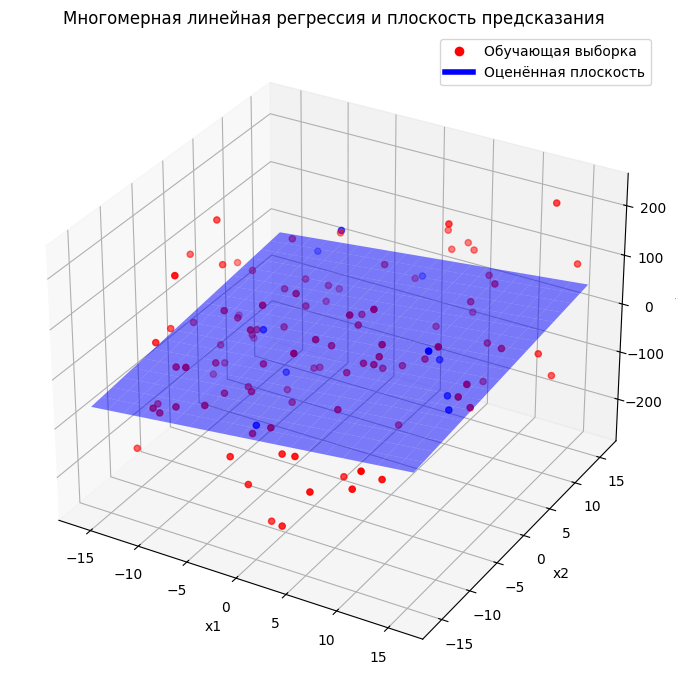

In [ ]:

a1_true = 2
a2_true, b_true = 2, 5
sigma = 100

t1, t2 = -16, 16  # диапазон для x1
s1, s2 = -16, 16  # диапазон для x2

n_train = 100
x1_train, x2_train, y_train = generate_data(n_train, a1_true, a2_true, b_true, sigma, t1, t2, s1, s2)

a1_hat, a2_hat, b_hat = get_best_coefs_3d(x1_train, x2_train, y_train)

y_pred_train = predict(x1_train, x2_train, a1_hat, a2_hat, b_hat)
r2_train = get_r2(y_train, y_pred_train)
qwe = 1 - (sigma**2)/((sigma**2+(a1_true**2*(t2-t1)**2)/12 + (a2_true**2*(s2-s1)**2)/12))
print(f"Оценённые коэффициенты: a1 = {a1_hat:.3f}, a2 = {a2_hat:.3f}, b = {b_hat:.3f}")
print(f"R^2 : {qwe:.3f}")
print(f"R^2 на обучающей выборке: {r2_train:.3f}")

n_test = 10
x1_test, x2_test, y_test = generate_data(n_test, a1_true, a2_true, b_true, sigma, t1, t2, s1, s2)
y_pred_test = predict(x1_test, x2_test, a1_hat, a2_hat, b_hat)
r2_test = get_r2(y_test, y_pred_test)

print(f"R^2 на тестовой выборке: {r2_test:.3f}")


x1_grid, x2_grid = np.meshgrid(np.linspace(t1, t2, 20), np.linspace(s1, s2, 20))
y_grid = a1_hat * x1_grid + a2_hat * x2_grid + b_hat


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x1_train, x2_train, y_train, color='r')
ax.scatter(x1_test, x2_test, y_test, color='b')
surface = ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='blue')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Многомерная линейная регрессия и плоскость предсказания')


custom_lines = [Line2D([0], [0], marker='o', color='w', label='Обучающая выборка',
                       markerfacecolor='r', markersize=8),
                Line2D([0], [0], color='blue', lw=4, label='Оценённая плоскость')]
ax.legend(handles=custom_lines)

plt.tight_layout()
plt.show()

In [ ]:
def get_best_coefs(x, y):
  n = x.size
  s_x, s_y, s_xy, s_x2 = 0,0,0,0
  for i in range(n):
    s_x += x[i]
    s_y += y[i]
    s_xy += x[i] * y[i]
    s_x2 += x[i] ** 2
  a = (s_xy - s_x * s_y / n) / (s_x2 - s_x**2 / n)
  b = (s_xy - s_x2 * s_y / s_x) / (s_x - n * s_x2 / s_x)
  return a, b

def get_y_mean(y):
  n = y.size
  y_mean = 0
  for i in range(n):
    y_mean += y[i]
  return y_mean / n

def get_y_best(x, a_best, b_best):
  y_best = []
  for i in range(x.size):
    y_best.append(a_best * x[i] + b_best)
  return y_best

def get_r2(y, y_best, y_mean):
  n = y.size
  s1 = 0.
  s2 = 0.
  for i in range(n):
    s1 += (y[i] - y_best[i])**2
    s2 += (y[i] - y_mean)**2
  return 1-(s1/s2)

a 2.0613432552387003
b 0.17553016076157968
r2 0.9951460862211334
new r2 0.9938390212777035


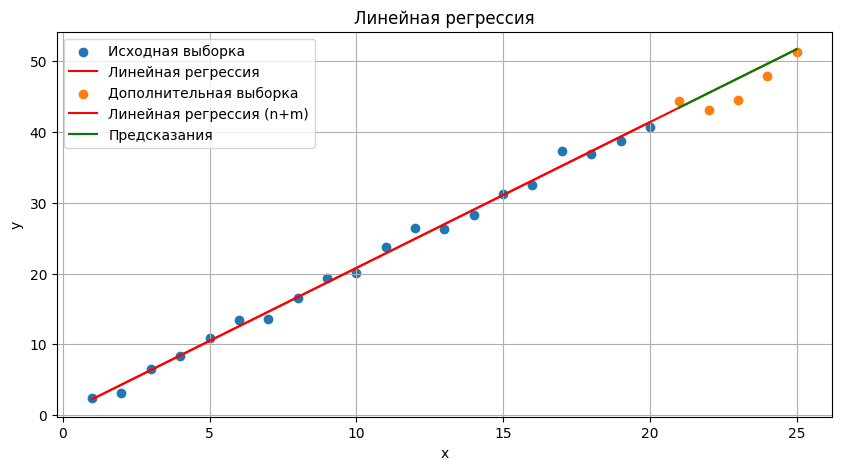

In [ ]:
a = 2  # Коэффициент a
b = 1  # Коэффициент b
n = 20  # Размер первой выборки
sigma = 1  # Стандартное отклонение шума

X = np.arange(1, n + 1)
y = a * X + b
Y = np.random.normal(y, sigma)

a_best, b_best = get_best_coefs(X,Y)
print('a ' + str(a_best))
print('b '+str(b_best))

###
y_best = get_y_best(X, a_best, b_best)
y_mean = get_y_mean(Y)
#print(y_mean)
r2 = get_r2(Y, y_best, y_mean)
print('r2 '+ str(r2))
###

y_pred = a_best * X + b_best
# Визуализация
plt.figure(figsize=(10, 5))

# Первая выборка
plt.scatter(X, Y, label="Исходная выборка")
plt.plot(X, y_pred, color="red", label="Линейная регрессия")
'''print('a ' + str(a_best))
print('b '+str(b_best))
y_best = get_y_best(X, a_best, b_best)
y_mean = get_y_mean(Y)
r2 = get_r2(Y, y_best, y_mean)
print('r2 '+ str(r2))'''


# 4. Получить дополнительную выборку и сравнить предсказания
#n =10
m = 5  # Размер дополнительной выборки
X_new = np.arange(n + 1, n + m + 1)
y_new = a * X_new + b
Y_new = np.random.normal(y_new, sigma)

#a_best, b_best = get_best_coefs(X_new,Y_new)

y_pred_new = a_best * X_new + b_best
# Дополнительная выборка
plt.scatter(X_new, Y_new, label="Дополнительная выборка")

X_combined = np.concatenate([X, X_new])
Y_combined = np.concatenate([Y, Y_new])

y_pred_combined = a_best * X_combined + b_best

plt.plot(X_combined, y_pred_combined, color="red", label="Линейная регрессия (n+m)")

plt.plot(X_new, y_pred_new, color="green", label="Предсказания")

y_best = get_y_best(X_combined, a_best, b_best)
y_mean = get_y_mean(Y_combined)
r2 = get_r2(Y_combined, y_best, y_mean)
print('new r2 '+ str(r2))
# Дополнительная выборка
#plt.scatter(X_new, Y_new, label="Дополнительная выборка")
#plt.plot(X_new, y_pred_new, color="green", label="Предсказания")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

2.3724759950978522
-3.6146780924617836


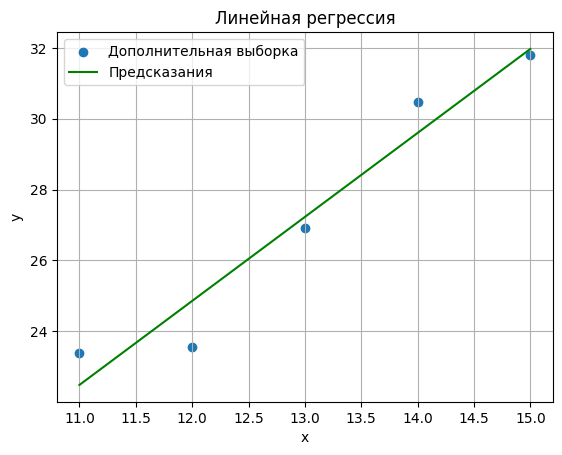

In [ ]:
# 4. Получить дополнительную выборку и сравнить предсказания
m = 5  # Размер дополнительной выборки
X_new = np.arange(n + 1, n + m + 1)
y_new = a * X_new + b
Y_new = np.random.normal(y_new, sigma)

a_best, b_best = get_best_coefs(X_new,Y_new)
print('a ' + str(a_best))
print('b '+str(b_best))

y_pred_new = a_best * X_new + b_best

r2 = get_r2(Y_new, y_best, y_mean)
print('r2 '+ str(r2))
# Дополнительная выборка
plt.scatter(X_new, Y_new, label="Дополнительная выборка")
plt.plot(X_new, y_pred_new, color="green", label="Предсказания")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

a 2.002906267664903
b 0.9275845555204115
r2 0.9706419708893916


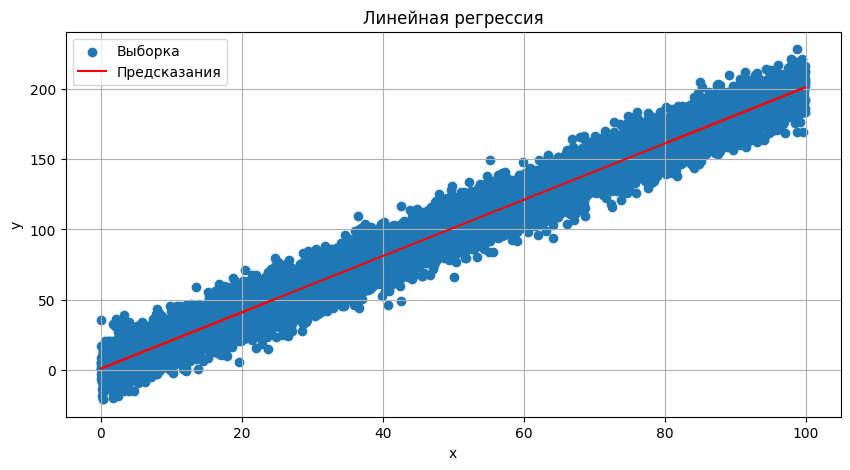

In [ ]:
# 5. Повторить с случайным x
a = 2  # Коэффициент a
b = 1  # Коэффициент b
n = 10000
t1 = 0
t2 = 100
sigma= 10
X_random = np.random.uniform(t1, t2, n)
y_random = a * X_random + b
Y_random = np.random.normal(y_random, sigma)

a_best, b_best = get_best_coefs(X_random,Y_random)
print('a ' + str(a_best))
print('b '+str(b_best))
y_best = get_y_best(X_random, a_best, b_best)
y_mean = get_y_mean(Y_random)
r2 = get_r2(Y_random, y_best, y_mean)
print('r2 '+ str(r2))

y_random_new = a_best * X_random + b_best
# Визуализация
plt.figure(figsize=(10, 5))

plt.scatter(X_random, Y_random, label="Выборка")
plt.plot(X_random, y_random_new, color="red", label="Предсказания")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

##Примменение метода Sklearn
Набор данных о цветке ириса или набор данных об ирисе Фишера представляет собой многомерный набор данных, представленный британским статистиком, евгеником и биологом Рональдом Фишером в его статье 1936 года «Использование множественных измерений в таксономических задачах в качестве примера линейного дискриминантного анализа».

Набор данных состоит из 50 образцов каждого из трех видов ириса (Iris setosa, Iris virginica и Iris versicolor). У каждого образца измеряли четыре характеристики: длину и ширину чашелистиков и лепестков в сантиметрах. На основе комбинации этих четырех признаков Фишер разработал линейную дискриминантную модель, позволяющую отличать виды друг от друга.

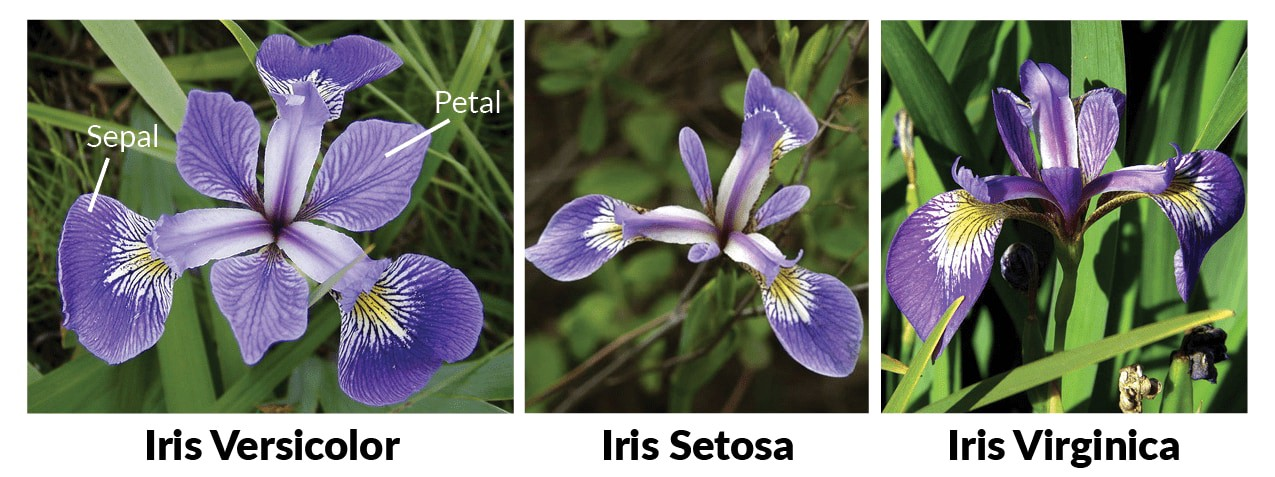

Скачать датасет: https://drive.google.com/file/d/1s7OL8q6xiyRwjhrsVKOHxPUVaz5pJnNN/view?usp=share_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [ ]:
def draw_corr_matrix(df: pd.DataFrame, shape: int): # df-ваш датафрейм, shape - размер матрицы
    df = df.corr().copy()
    plt.rcParams["figure.figsize"] = shape,shape
    plt.imshow(df, cmap ='viridis')


    plt.colorbar()

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text = plt.text(j, i, round(float(df.iloc[i, j]),2),
                        ha="center", va="center", color="r")

    plt.xticks(range(len(df)), df.columns, rotation = 45)


    plt.yticks(range(len(df)), df.index)

    plt.show()

In [ ]:
data = pd.read_csv('/content/Iris_dataset.csv')

In [ ]:
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
#data.dropna(inplace=True)
data.sepal_width.replace(np.NaN, data.sepal_width.mean(), inplace = True)

In [ ]:
data.sepal_length.replace(np.NaN, data.sepal_length  .mean(), inplace = True)

In [ ]:
data.petal_length.replace(np.NaN, data.petal_length.mean(), inplace = True)

In [ ]:
data.petal_width.replace(np.NaN, data.petal_width.mean(), inplace = True)

In [ ]:
data

In [ ]:
data.species.value_counts()

In [ ]:
data.species.replace('Iris-versicolor', 0, inplace=True)
data.species.replace('Iris-virginica', 1, inplace=True)
data.species.replace('Iris-setosa', 2, inplace=True)

In [ ]:
data = data.sample(frac=1, random_state=10).reset_index(drop=True)

In [ ]:
draw_corr_matrix(data, 7)

In [ ]:
X = data.drop(columns=['species'])

In [ ]:
y = data['species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Логистическая регрессия

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
lr = LinearRegression(random_state=10)

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_test_predictions_lr=lr.predict(x_test)

In [ ]:
y_test_predictions_lr

In [ ]:
metrics.accuracy_score(y_test, y_test_predictions_lr)*100